In [20]:
import pandas as pd
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Setup

In [24]:
df = pd.read_csv(r"C:\Users\saad1\Documents\Python_Time_Series\Time_Series_Files\Time Series Analysis\CAPSTONE PROJECT - Airmiles\airmiles.csv")

In [25]:
df.head()

,Date,airmiles
0,1/1/1996,30983174
1,1/2/1996,32147663
2,1/3/1996,38342975
3,1/4/1996,35969113
4,1/5/1996,36474391


In [28]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")
df.head()

,Date,airmiles
0,1996-01-01,30983174
1,1996-02-01,32147663
2,1996-03-01,38342975
3,1996-04-01,35969113
4,1996-05-01,36474391


In [30]:
df.set_index('Date', inplace=True)

In [31]:
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [32]:
# Change the name of the time series variable t y
df = df.rename(columns = {"airmiles": "y"})
df.head()

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [34]:
df = df.asfreq('MS')
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

## Data Visualization

<Axes: xlabel='Date'>

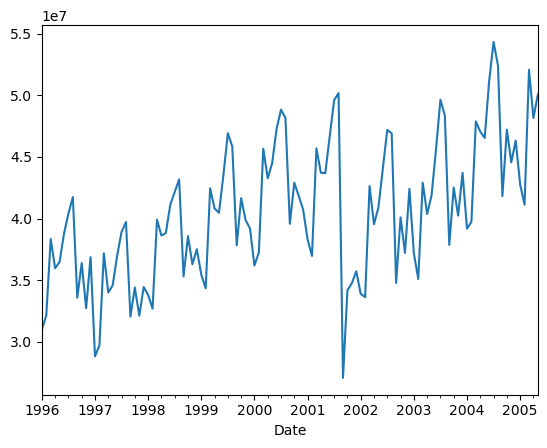

In [35]:
df['y'].plot()

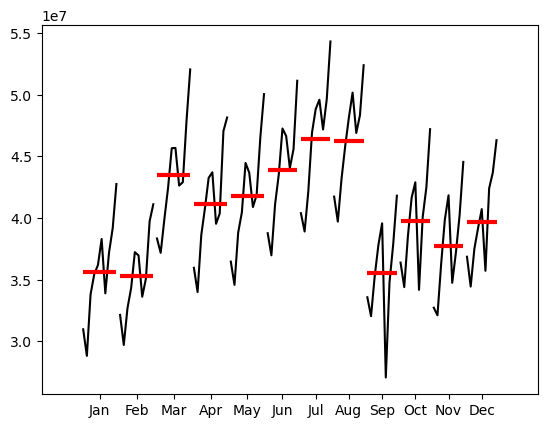

In [37]:
month_plot(df['y'])
plt.show()

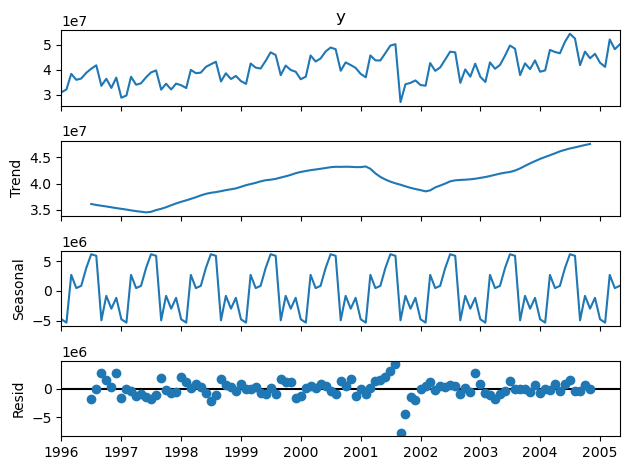

In [42]:
seasonal_decompose(df['y'], model='additive',period=12).plot()
plt.show()

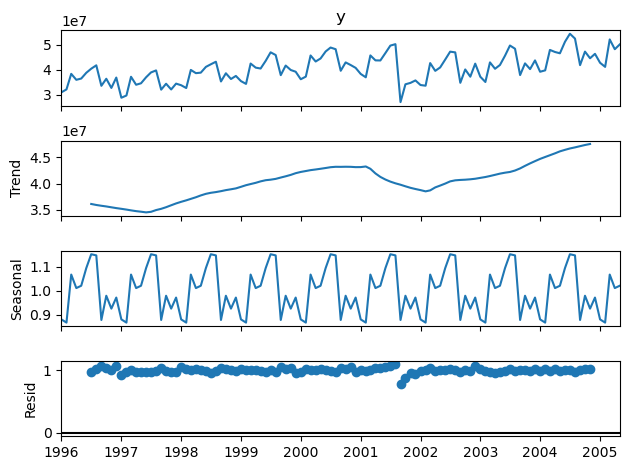

In [43]:

seasonal_decompose(df['y'], model='multiplicative',period=12).plot()
plt.show()

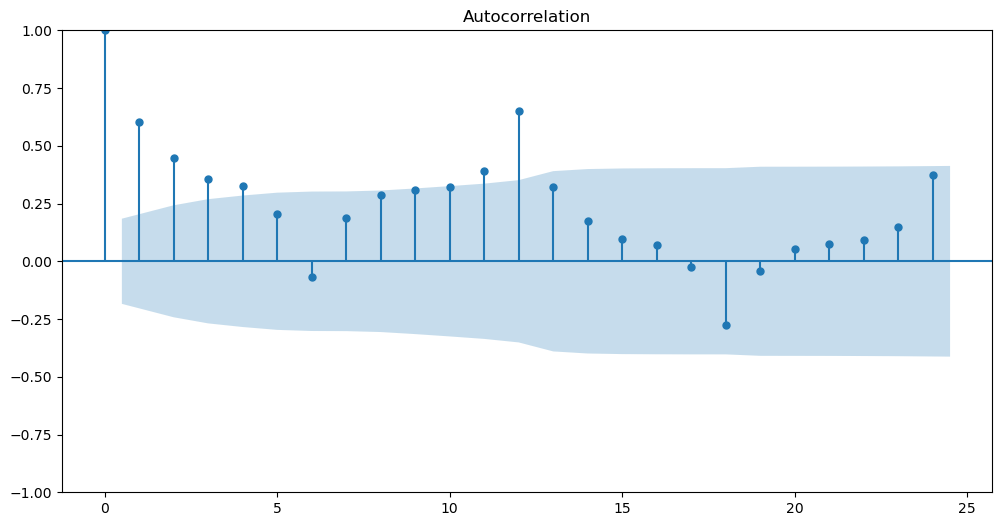

In [46]:
fig, ax = plt.subplots(figsize = (12,6))
plot_acf(df['y'], lags=24, ax=ax)
plt.show()


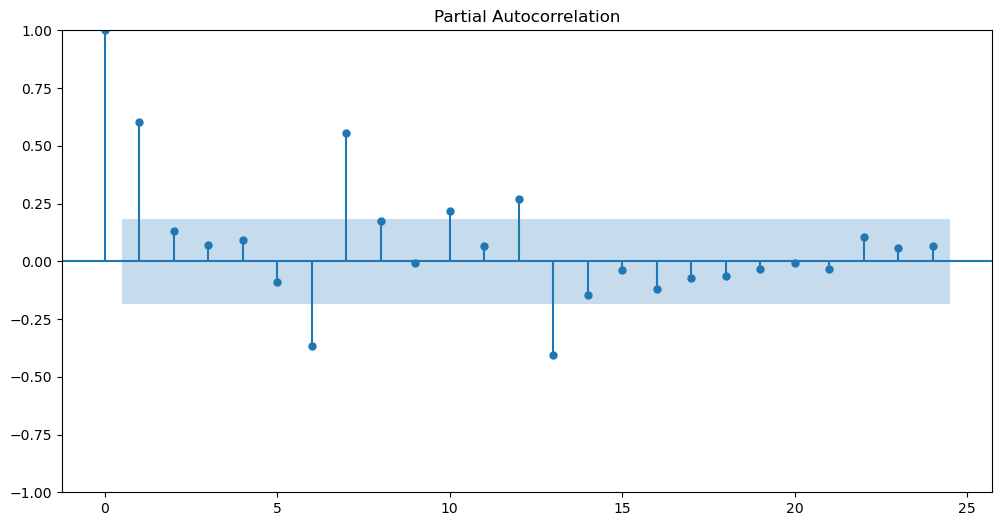

In [47]:
fig, ax = plt.subplots(figsize = (12,6))
plot_pacf(df['y'], lags=24, ax=ax)
plt.show()


## Modelling

In [48]:
periods = 12
train = df[:-periods]
test = df[-periods:]



In [57]:
tes_model = ExponentialSmoothing(train,
                                 trend = 'mul',
                                 seasonal = 'mul',
                                 seasonal_periods = 12).fit()
tes_model.summary()

c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,y,No. Observations:,101
Model:,ExponentialSmoothing,SSE,322608035714154.500
Optimized:,True,AIC,2940.026
Trend:,Multiplicative,BIC,2981.868
Seasonal:,Multiplicative,AICC,2948.368
Seasonal Periods:,12,Date:,"Sun, 13 Apr 2025"
Box-Cox:,False,Time:,16:02:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5353571,alpha,True
smoothing_trend,0.0254932,beta,True


In [58]:
tes_fct = tes_model.forecast(periods)
tes_fct

2004-06-01    4.989814e+07
2004-07-01    5.232020e+07
2004-08-01    5.246731e+07
2004-09-01    4.147231e+07
2004-10-01    4.632250e+07
2004-11-01    4.366543e+07
2004-12-01    4.583298e+07
2005-01-01    4.142760e+07
2005-02-01    4.104454e+07
2005-03-01    5.053423e+07
2005-04-01    4.798055e+07
2005-05-01    4.852405e+07
Freq: MS, dtype: float64

In [59]:
def model_assessment(train,test, predictions, chart_title=None):
    plt.figure(figsize=(10,4))

    plt.plot(train, label='train data')
    plt.plot(test, label = 'test data' )
    plt.plot(predictions, label = 'Forecast data')

    plt.title(chart_title)
    plt.legend()
    plt.show()

    rmse = root_mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test,predictions)

    print(f"RMSE : {rmse:.0f} ")
    print(f"MAE : {mae:.0f} ")
    print(f"MAPE : {100*mape:.1f} %")




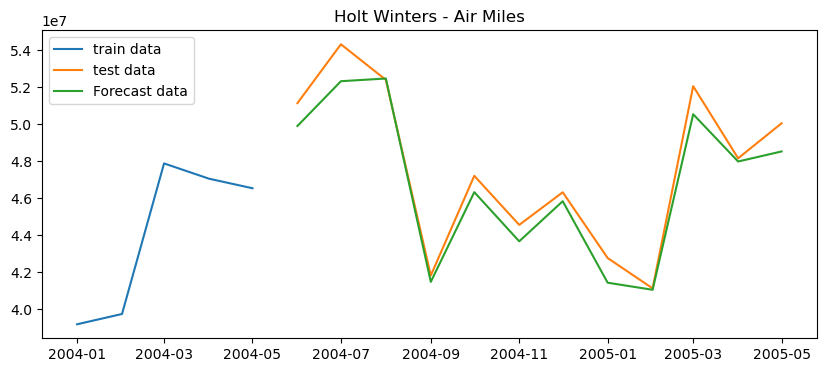

RMSE : 1075653 
MAE : 877575 
MAPE : 1.8 %


In [61]:
model_assessment(train.loc['2004'],test,tes_fct,"Holt Winters - Air Miles")

In [63]:
tes_model_full = ExponentialSmoothing(df.y,
                                 trend = 'add',
                                 seasonal = 'mul',
                                 seasonal_periods = 12).fit()
tes_model_full.summary()

c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,y,No. Observations:,113
Model:,ExponentialSmoothing,SSE,333234976992115.688
Optimized:,True,AIC,3276.510
Trend:,Additive,BIC,3320.149
Seasonal:,Multiplicative,AICC,3283.787
Seasonal Periods:,12,Date:,"Sun, 13 Apr 2025"
Box-Cox:,False,Time:,16:04:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5353571,alpha,True
smoothing_trend,0.0254932,beta,True


In [64]:
predictions = tes_model_full.forecast(12)
predictions

2005-06-01    5.312494e+07
2005-07-01    5.577188e+07
2005-08-01    5.548414e+07
2005-09-01    4.362999e+07
2005-10-01    4.907124e+07
2005-11-01    4.638544e+07
2005-12-01    4.864741e+07
2006-01-01    4.407734e+07
2006-02-01    4.343077e+07
2006-03-01    5.364640e+07
2006-04-01    5.077950e+07
2006-05-01    5.140075e+07
Freq: MS, dtype: float64

In [65]:
def plot_future_predictions(y, forecast, chart_title=None):
    plt.figure(figsize=(10,4))
    plt.plot(y, label='train data')
    plt.plot(forecast, label = 'Forecast')
    plt.title(chart_title)
    plt.legend()
    plt.show()

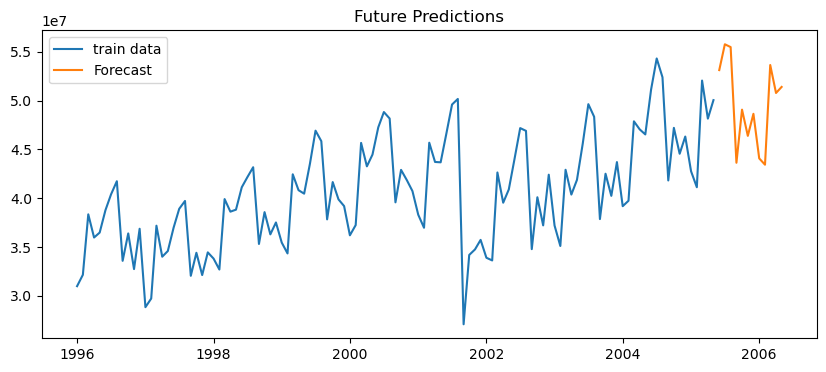

In [67]:
plot_future_predictions(df.y,predictions, 'Future Predictions')